In [1]:
import sys
sys.path.append('..')

import qgt
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# In this script we explore the problems related to the computation of Logarithmic Negativity naively

# We will consider an example of a four mode Gaussain state, which initially is the vacuum and apply a transformation on it

state = qgt.Gaussian_state("vacuum", 4)

# We will apply an strong two-mode squeezing operation on the first two modes

r = 2
theta = 0
state.two_mode_squeezing(r, theta, [0,1])


In [40]:
# Before spreading the entanglement we will compute the Logarithmic Negativity of the state

# Between first and second mode

LN_12 = state.logarithmic_negativity([0],[1])

print("Logarithmic Negativity between modes 1 and 2: ", LN_12)

# Between first and the rest of the modes

LN_1 = state.logarithmic_negativity([0],[1,2,3])

print("Logarithmic Negativity between mode 1 and the rest: ", LN_1)

# Between first and third and four

LN_13 = state.logarithmic_negativity([0],[2,3])

print("Logarithmic Negativity between modes 1 and 3: ", LN_13)

# Between second and the rest of the modes

LN_2 = state.logarithmic_negativity([1],[0,2,3])

print("Logarithmic Negativity between mode 2 and the rest: ", LN_2)

# Between second and third and four

LN_23 = state.logarithmic_negativity([1],[2,3])

print("Logarithmic Negativity between modes 2 and 3: ", LN_23)

Logarithmic Negativity between modes 1 and 2:  5.7707801635559095
Logarithmic Negativity between mode 1 and the rest:  5.77078016355591
Logarithmic Negativity between modes 1 and 3:  8.008566259537295e-16
Logarithmic Negativity between mode 2 and the rest:  5.770780163556005
Logarithmic Negativity between modes 2 and 3:  8.008566259537295e-16


In [71]:
# Then a beam splitter between mode one and third

tau = 0.01
state.beam_splitter(tau, [0,2])

# Finally a beam splitter between mode one and fourth

tau = 0.50
state.beam_splitter(tau, [2,3])


In [73]:
# Now we can compute the same Logarithmic Negativity of the state between different bipartitions

# Between first and second mode

LN_12 = state.logarithmic_negativity([0],[1])

print("Logarithmic Negativity between modes 1 and 2: ", LN_12)

# Between first and the rest of the modes

LN_1 = state.logarithmic_negativity([0],[1,2,3])

print("Logarithmic Negativity between mode 1 and the rest: ", LN_1)

# Between first and third and four

LN_13 = state.logarithmic_negativity([0],[2,3])

print("Logarithmic Negativity between modes 1, and 2 and 3: ", LN_13)

# Between second and the rest of the modes

LN_2 = state.logarithmic_negativity([1],[0,2,3])

print("Logarithmic Negativity between mode 2 and the rest: ", LN_2)

# Between second and third and four

LN_23 = state.logarithmic_negativity([1],[2,3])

print("Logarithmic Negativity between modes 2 and 3: ", LN_23)



Logarithmic Negativity between modes 1 and 2:  0.028833174893992224
Logarithmic Negativity between mode 1 and the rest:  1.024808348663177
Logarithmic Negativity between modes 1, and 2 and 3:  0.0
Logarithmic Negativity between mode 2 and the rest:  5.770780163555966
Logarithmic Negativity between modes 2 and 3:  5.426732050546658


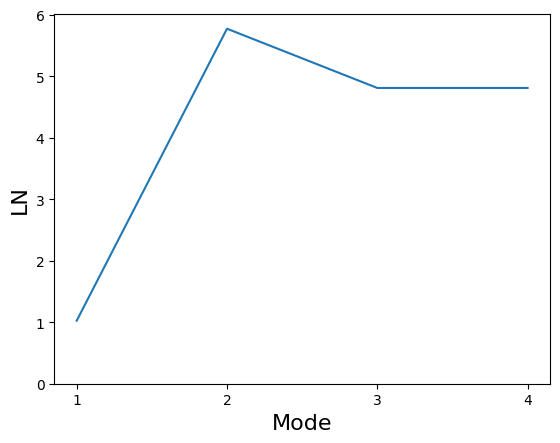

In [82]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot for all modes the Logarithmic Negativity between the mode and the rest
LogNeg = []
for mode in range(state.N_modes):
    rest = [i for i in range(state.N_modes) if i != mode]
    LogNeg.append(state.logarithmic_negativity([mode],rest))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(range(1,state.N_modes+1), LogNeg)

# Set the xaxis to only use integer ticks
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Set the lower limit of y axis to 0
ax.set_ylim(bottom=0)

# Set the xlabel and ylabel with increased font size
ax.set_xlabel('Mode', fontsize=16)
ax.set_ylabel('LN', fontsize=16)

plt.savefig('Logarithmic_Negativity_multimode.png')
# Show the plot
plt.show()



In [76]:
# Define the mean LogNeg per mode

def mean_logneg(InState):
    mean = 0
    for i in range(InState.N_modes):
        rest = [j for j in range(InState.N_modes) if j != i]
        mean += InState.logarithmic_negativity([i],rest)
    return mean/(InState.N_modes)

mean = mean_logneg(state)
print("Mean Logarithmic negativity per mode: ", mean)

Mean Logarithmic negativity per mode:  4.102817958224541
